# Exercise 4:  Linear Regression

---

## House Prices - Advanced Regression Techniques

#### Price Versus Area

Link: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [32]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [33]:
houseData = pd.read_csv('train.csv')

Extract the following Numeric variables from the dataset, and store as two new Pandas DataFrames

In [34]:
houseGrLivArea = pd.DataFrame(houseData['GrLivArea'])
houseSalePrice = pd.DataFrame(houseData['SalePrice'])

Plot houseSalePrice against houseGrLivArea using standard jointplot, and note the strong linear relationship.

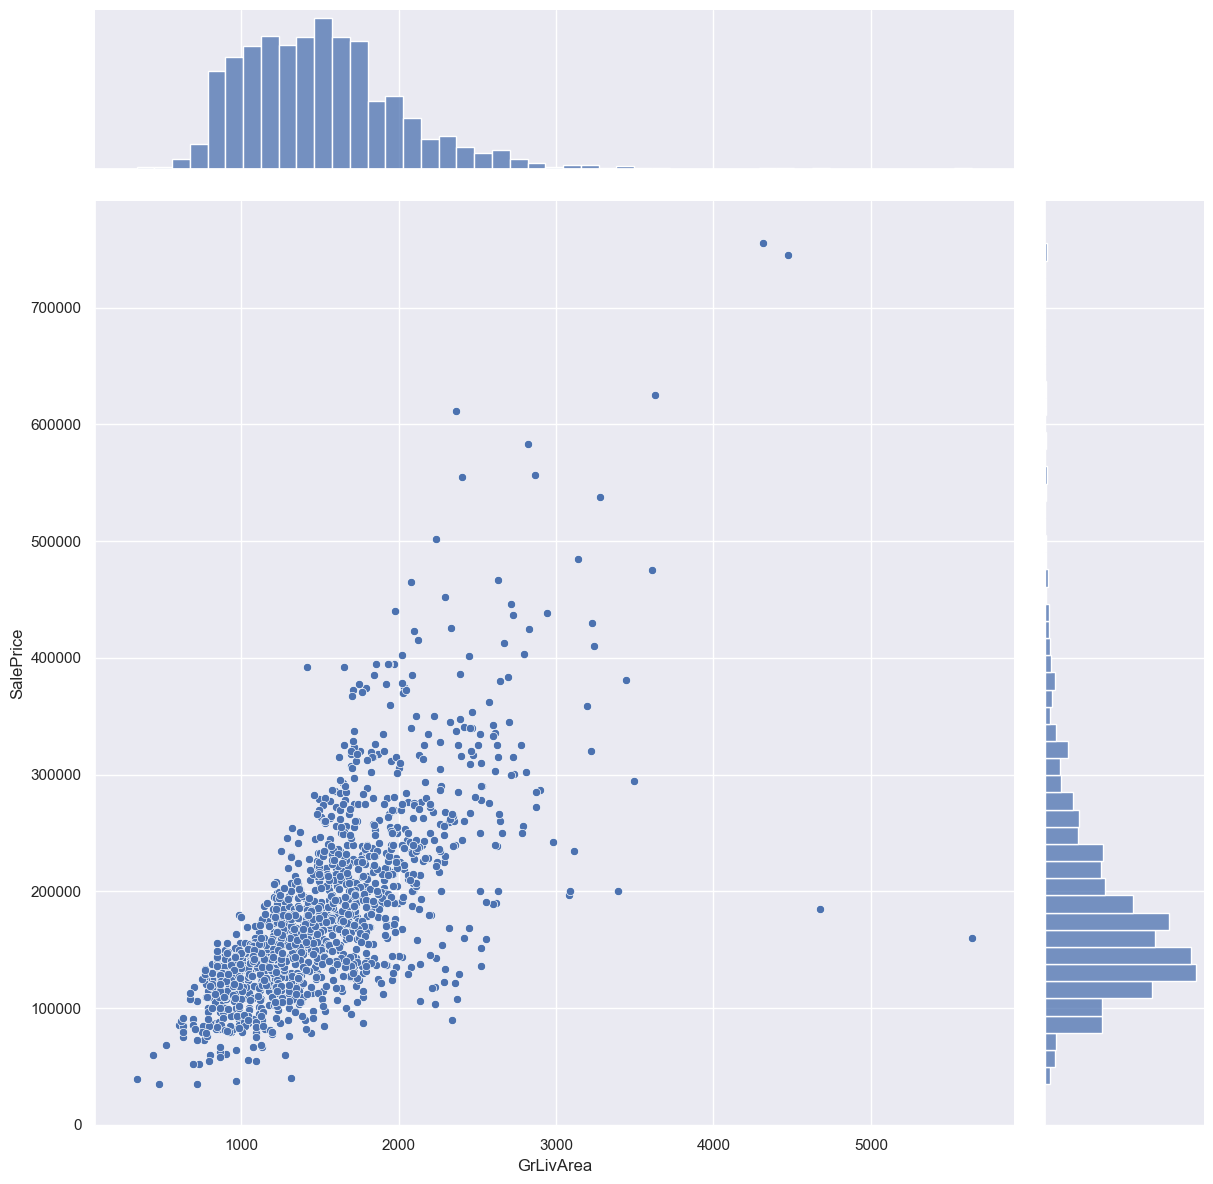

In [35]:
PriceVArea = pd.concat([houseGrLivArea, houseSalePrice], axis = 1).reindex(houseGrLivArea.index)

sb.jointplot(data = PriceVArea, x = "GrLivArea", y = "SalePrice", height = 12)

<Axes: >

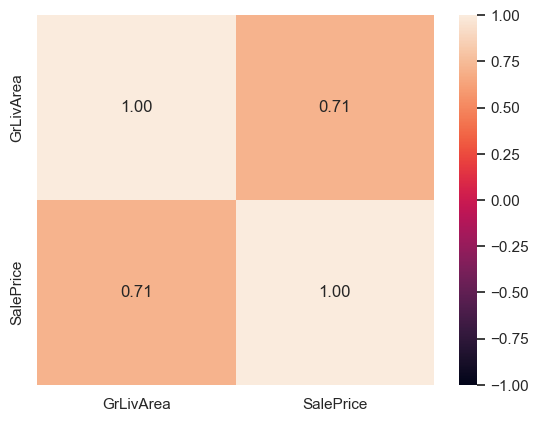

In [36]:
sb.heatmap(PriceVArea.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

Import Linear Regression model from Scikit-Learn

In [37]:
from sklearn.linear_model import LinearRegression

Partition both datasets houseGrLivArea and houseSalePrice into Train (1100 rows) and Test (360 rows) sets.

In [38]:
houseGrLivArea_train = pd.DataFrame(houseGrLivArea[:1100])
houseSalePrice_train = pd.DataFrame(houseSalePrice[:1100])

houseGrLivArea_test = pd.DataFrame(houseGrLivArea[-360:])
houseSalePrice_test = pd.DataFrame(houseSalePrice[-360:])

print("Train Set :", houseGrLivArea_train.shape, houseSalePrice_train.shape)
print("Test Set  :", houseGrLivArea_test.shape, houseSalePrice_test.shape)

Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)


Training : Fit a Linear Regression model with X = houseGrLivArea_train and y = houseSalePrice_train

In [39]:
linreg = LinearRegression()
linreg.fit(houseGrLivArea_train, houseSalePrice_train)

LinearRegression()

Print the coefficients of the Linear Regression model you just fit.

In [40]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [9498.33463562]
Coefficients 	: a =  [[113.88950443]]


Plot the Regression line on a Scatterplot of houseGrLivArea_train and houseSalePrice_train using the standard slope-intercept form of straight line.

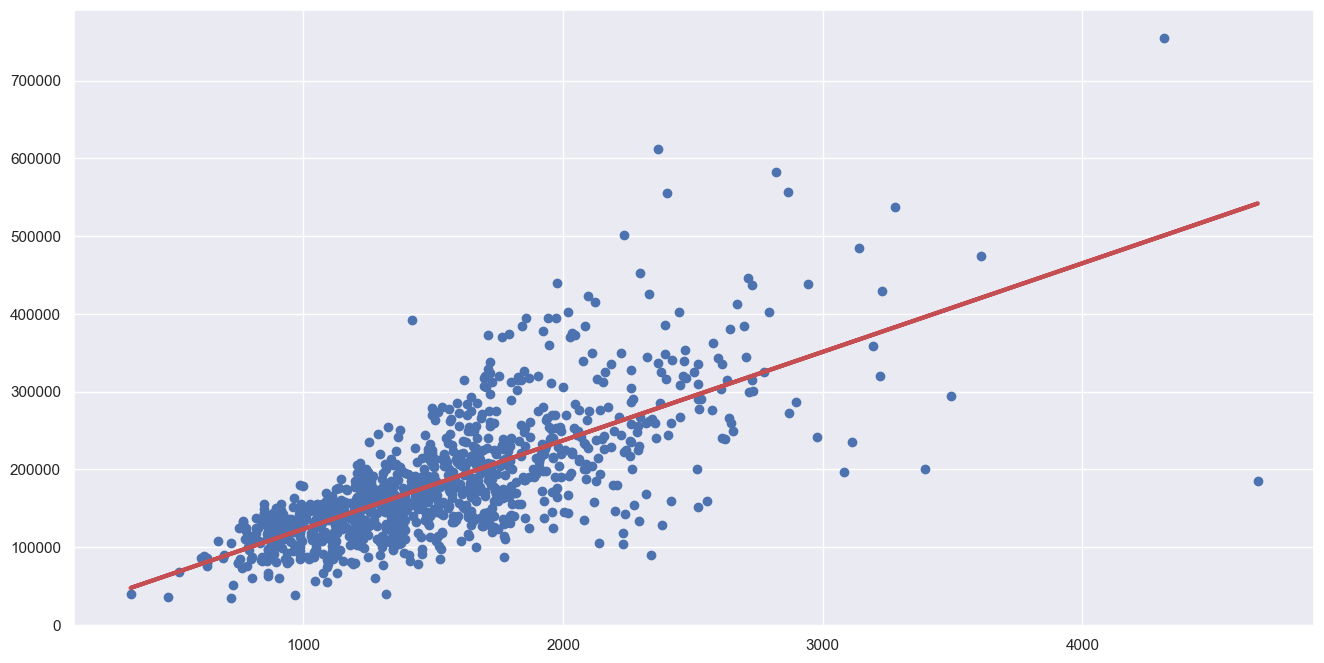

In [50]:
regline_x = houseGrLivArea_train
regline_y = linreg.intercept_ + linreg.coef_ * houseGrLivArea_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(houseGrLivArea_train, houseSalePrice_train)
plt.plot(regline_x.to_numpy(), regline_y.to_numpy(), 'r-', linewidth = 3)
plt.show()

Predict SalePrice for the test dataset houseGrLivArea_test using the Linear Regression model, and plot the predictions on the Scatterplot of houseGrLivArea_test and houseSalePrice_test to visualize the accuracy.

In [42]:
houseGrLivArea_train_pred = linreg.predict(houseGrLivArea_train)
houseGrLivArea_test_pred = linreg.predict(houseGrLivArea_test)

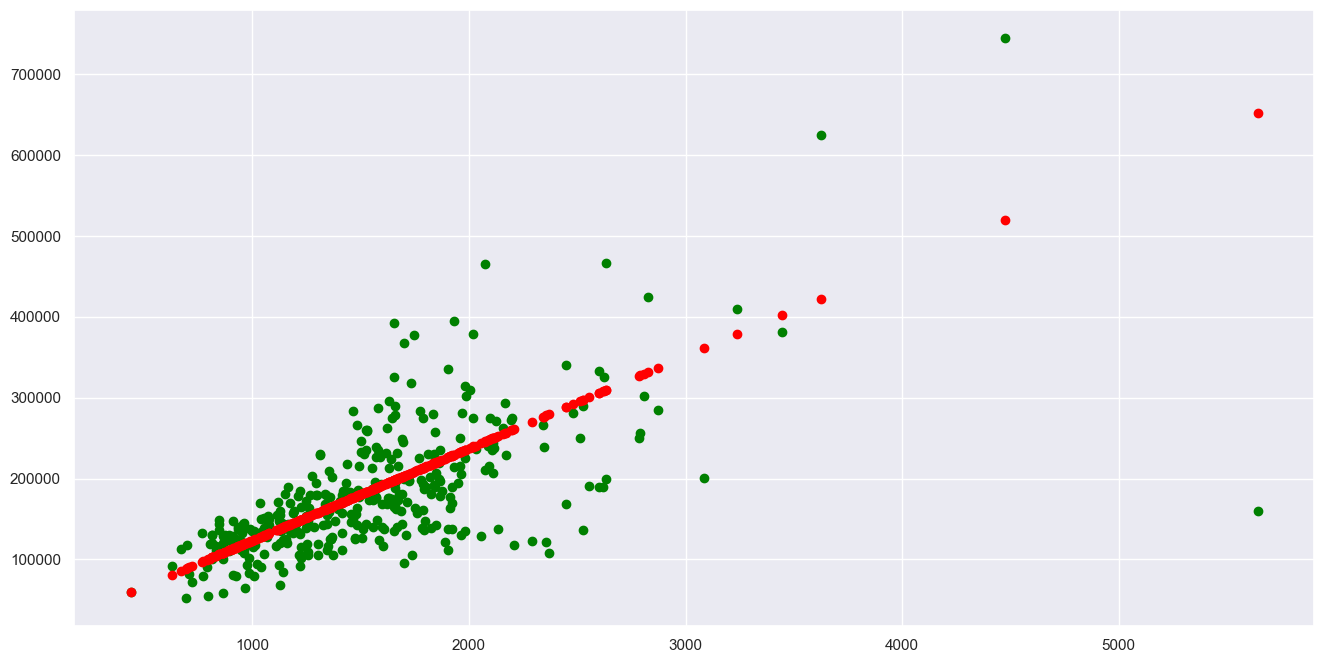

In [43]:
f = plt.figure(figsize=(16, 8))
plt.scatter(houseGrLivArea_test, houseSalePrice_test, color = "green")
plt.scatter(houseGrLivArea_test, houseGrLivArea_test_pred, color = "red")
plt.show()

Find the Explained Variance (R^2) of the model on the Train set and on the Test set to check Goodness of Fit.

In [44]:
def mean_sq_err(actual, predicted):
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

In [45]:
def mean_sq_err(actual, predicted):
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(houseGrLivArea_train, houseSalePrice_train))
mse = mean_sq_err(houseSalePrice_train, houseGrLivArea_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

print("\n\n\nGoodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(houseGrLivArea_test, houseSalePrice_test))
mse = mean_sq_err(houseSalePrice_test, houseGrLivArea_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5317704755454566
Mean Squared Error (MSE) 	: 2962940662.7214036
Root Mean Squared Error (RMSE) 	: 54432.90055399771



Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4011772000692575
Mean Squared Error (MSE) 	: 3737081522.2960925
Root Mean Squared Error (RMSE) 	: 61131.67364219707
